In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
import os
os.chdir("/Users/zyxu/Documents/R/23spring")
# Load the matrix from the CSV file
matrix_data = pd.read_csv("CRC_matrix_data.csv")

matrix_data.shape

study_names = pd.read_csv("CRC_study_name.csv")
study_names['study'] = study_names['x']
study_names

,x,study
0,FengQ_2015,FengQ_2015
1,FengQ_2015,FengQ_2015
2,FengQ_2015,FengQ_2015
3,FengQ_2015,FengQ_2015
4,FengQ_2015,FengQ_2015
...,...,...
1390,ZellerG_2014,ZellerG_2014
1391,ZellerG_2014,ZellerG_2014
1392,ZellerG_2014,ZellerG_2014
1393,ZellerG_2014,ZellerG_2014


In [2]:
threshold = 0.98 * matrix_data.shape[0]
cols_with_zeros = (matrix_data == 0).sum(axis=0) > threshold
selected_species = matrix_data.columns[cols_with_zeros]
selected_species.shape

(517,)

In [6]:
# species = selected_species[0]
# zero_data = study_names.copy()
# species_data = matrix_data[species]
# zero_data['zeros'] = (species_data == 0)
# # Count total and zero samples for each study
# total_samples_per_study = zero_data.groupby('study').size()
# zero_samples_per_study = zero_data.groupby('study').sum()['zeros']

# # Find studies with a high proportion of zeros
# high_zero_studies = (zero_samples_per_study / total_samples_per_study) >= 1
# high_zero_studies

study
FengQ_2015         False
GuptaA_2019         True
HanniganGD_2017     True
ThomasAM_2018a     False
ThomasAM_2018b      True
ThomasAM_2019_c    False
VogtmannE_2016     False
WirbelJ_2018       False
YachidaS_2019      False
YuJ_2015           False
ZellerG_2014       False
dtype: bool

In [25]:
threshold_study = 1

results = {}

for species in selected_species:
    species_data = matrix_data[species]
    
    zero_data = study_names.copy()
    zero_data['zeros'] = (species_data == 0)
    
    # Count total and zero samples for each study
    total_samples_per_study = zero_data.groupby('study').size()
    zero_samples_per_study = zero_data.groupby('study').sum()['zeros']
    
    # Find studies with a high proportion of zeros
    high_zero_studies = (zero_samples_per_study / total_samples_per_study) >= threshold_study
    # print((zero_samples_per_study / total_samples_per_study))
    
    results[species] = high_zero_studies[high_zero_studies].index.tolist()

print(results)


{'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus|s__Streptococcus_sp_HMSC034E03': ['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018b'], 'k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Cardiobacteriales|f__Cardiobacteriaceae|g__Cardiobacterium|s__Cardiobacterium_valvarum': ['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2018b', 'VogtmannE_2016', 'ZellerG_2014'], 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_plantarum': ['GuptaA_2019', 'ThomasAM_2018a'], 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Leuconostoc|s__Leuconostoc_pseudomesenteroides': ['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2019_c', 'VogtmannE_2016', 'YachidaS_2019', 'YuJ_2015'], 'k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis': ['GuptaA_2019', 'HanniganGD_2017', 

In [26]:
len(results.keys())

517

In [28]:
count = 0
for key,val in results.items():
    if val:
        print(val)
        count += 1
count

['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018b']
['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2018b', 'VogtmannE_2016', 'ZellerG_2014']
['GuptaA_2019', 'ThomasAM_2018a']
['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2019_c', 'VogtmannE_2016', 'YachidaS_2019', 'YuJ_2015']
['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2018b', 'ThomasAM_2019_c', 'VogtmannE_2016', 'WirbelJ_2018', 'YachidaS_2019', 'YuJ_2015', 'ZellerG_2014']
['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2018b', 'ThomasAM_2019_c', 'VogtmannE_2016', 'WirbelJ_2018', 'YachidaS_2019', 'YuJ_2015']
['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'VogtmannE_2016', 'YuJ_2015']
['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2018b', 'ThomasAM_2019_c', 'VogtmannE_2016', 'WirbelJ_2018', 'YachidaS_2019', 'YuJ_2015', 'ZellerG_2014']
['GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2019_c', 'WirbelJ_2018', 'YuJ_2015']
['GuptaA_2019',

517

In [30]:
unique_studies = study_names['study'].unique()

In [31]:
all_X = np.vstack([matrix_data[study_names['study'] == study].values for study in unique_studies])
all_X.shape

(1395, 935)

In [32]:
all_X = matrix_data

,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Streptococcaceae|g__Streptococcus|s__Streptococcus_salivarius,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Anaerostipes|s__Anaerostipes_hadrus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_stercoris,k__Bacteria|p__Actinobacteria|c__Coriobacteriia|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella_aerofaciens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_longum,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_plebeius,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_vulgatus,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Lachnospiraceae|g__Dorea|s__Dorea_longicatena,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Eubacteriaceae|g__Eubacterium|s__Eubacterium_sp_CAG_251,...,k__Eukaryota|p__Ascomycota|c__Saccharomycetes|o__Saccharomycetales|f__Debaryomycetaceae|g__Candida|s__Candida_tropicalis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Leuconostocaceae|g__Weissella|s__Weissella_hellenica,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus|s__Staphylococcus_vitulinus,k__Bacteria|p__Proteobacteria|c__Epsilonproteobacteria|o__Campylobacterales|f__Campylobacteraceae|g__Campylobacter|s__Campylobacter_coli,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Corynebacteriales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_striatum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Corynebacteriales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_pseudodiphtheriticum,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_crustorum,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_farciminis,k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Enterobacteriaceae|g__Klebsiella|s__Klebsiella_quasivariicola,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinobaculum|s__Actinobaculum_massiliense
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
import jax.numpy as jnp
from jax import grad, jit, value_and_grad
import jaxopt
from jaxopt import GradientDescent

def loss(V, studies_data, Cs):
    """ Compute the loss given V. """
    total_loss = 0.0
    for i, X in enumerate(studies_data):
        U, Sigma, _ = jnp.linalg.svd(jnp.dot(X, Cs[i]) @ V.T, full_matrices=False)
        rank = 10
        U, Sigma = U[:, :rank], Sigma[:rank]
        approximation = U @ jnp.diag(Sigma) @ V @ Cs[i]
        total_loss += jnp.linalg.norm(X - approximation, 'fro')**2
    return total_loss

# Gradient computation using jax
grad_loss = jit(grad(loss))

rank = 10
# Initial V from the combined SVD as before
_, _, Vt_initial = np.linalg.svd(matrix_data, full_matrices=False)
# V_initial = Vt_initial.T
V_initial = Vt_initial[:rank, :]

# Assuming studies_data is a list of matrices X for each study and Cs is a list of matrices C for each study
studies_data = [matrix_data[study_names['study'] == study].values for study in unique_studies]

# Create C matrices for each study based on species with a high proportion of zeros
def construct_C_for_study(study, results, matrix_data):
    C = jnp.eye(935)
    species_with_high_zeros = results.keys() & set(matrix_data.columns)
    for species in species_with_high_zeros:
        if study in results[species]:
            species_index = matrix_data.columns.get_loc(species)
            C = C.at[species_index, species_index].set(0)
    return C

# Constructing Cs for each study
Cs = [construct_C_for_study(study, results, matrix_data) for study in unique_studies]




In [63]:
solver = jaxopt.LBFGS(fun=loss, maxiter=100)
res = solver.run(V_initial, studies_data=studies_data, Cs=Cs)

# Alternatively, we could have used one of these solvers as well:
# solver = jaxopt.GradientDescent(fun=ridge_reg_objective, maxiter=500)
# solver = jaxopt.ScipyMinimize(fun=ridge_reg_objective, method="L-BFGS-B", maxiter=500)
# solver = jaxopt.NonlinearCG(fun=ridge_reg_objective, method="polak-ribiere", maxiter=500)

INFO: jaxopt.ZoomLineSearch: Iter: 30, Stepsize: 1.862645149230957e-09, Decrease error: inf, Curvature error: inf
INFO: jaxopt.ZoomLineSearch: Iter: 30, Stepsize: 1.862645149230957e-09, Decrease error: inf, Curvature error: inf
INFO: jaxopt.ZoomLineSearch: Iter: 30, Stepsize: 1.862645149230957e-09, Decrease error: inf, Curvature error: inf
INFO: jaxopt.ZoomLineSearch: Iter: 30, Stepsize: 1.862645149230957e-09, Decrease error: inf, Curvature error: inf
INFO: jaxopt.ZoomLineSearch: Iter: 30, Stepsize: 1.862645149230957e-09, Decrease error: inf, Curvature error: inf
INFO: jaxopt.ZoomLineSearch: Iter: 30, Stepsize: 1.862645149230957e-09, Decrease error: inf, Curvature error: inf
INFO: jaxopt.ZoomLineSearch: Iter: 30, Stepsize: 1.862645149230957e-09, Decrease error: inf, Curvature error: inf
INFO: jaxopt.ZoomLineSearch: Iter: 30, Stepsize: 1.862645149230957e-09, Decrease error: inf, Curvature error: inf
INFO: jaxopt.ZoomLineSearch: Iter: 30, Stepsize: 1.862645149230957e-09, Decrease error: 

In [65]:
type(res)

jaxopt._src.base.OptStep

In [66]:
params, state = res
print(params, state)

[[-4.3497346e-02 -5.1323832e-03 -3.8044602e-03 ... -9.1461677e-10
  -1.0301907e-09 -1.8082867e-09]
 [ 2.8929380e-03  3.9742175e-03  1.7037832e-03 ...  2.2143751e-09
   9.0733715e-10  3.0581209e-09]
 [-1.3680710e-01 -9.7589260e-03 -6.3297898e-02 ... -3.4112421e-08
  -3.8766736e-08 -4.7722423e-08]
 ...
 [ 2.1715982e-01  1.1369447e-02 -2.0030160e-01 ...  1.5714751e-07
   1.6482987e-07  5.9223407e-07]
 [-5.8412943e-02  1.3090442e-03 -1.4481477e-02 ... -5.8168229e-08
   3.6347014e-10 -9.2003610e-08]
 [ 2.3781234e-01  1.3415482e-02  2.8962020e-02 ...  2.5924386e-08
  -8.4772500e-09 -3.3137844e-08]] LbfgsState(iter_num=Array(100, dtype=int32, weak_type=True), value=Array(8.77732e+14, dtype=float32), grad=Array([[-1.0856393e+13, -3.4829215e+11, -1.1332945e+13, ...,
         8.2097700e+06,  9.4748910e+06,  2.1188508e+07],
       [-3.6283299e+12,  2.2544782e+12,  3.0246825e+12, ...,
         7.7398038e+05, -2.7674438e+05,  9.0843130e+06],
       [-3.5241436e+13, -2.4471386e+12, -1.2308599e+13, .

In [67]:
params.shape

(10, 935)

In [78]:
unique_studies

array(['FengQ_2015', 'GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a',
       'ThomasAM_2018b', 'ThomasAM_2019_c', 'VogtmannE_2016',
       'WirbelJ_2018', 'YachidaS_2019', 'YuJ_2015', 'ZellerG_2014'],
      dtype=object)

In [79]:
V = params
study_decompositions = {}
for i, study in enumerate(unique_studies):
    X = studies_data[i]
    print(jnp.dot(X, Cs[i]).shape)
    U, Sigma, _ = jnp.linalg.svd(jnp.dot(X, Cs[i]) @ V.T, full_matrices=False)
    rank = 10
    U, Sigma = U[:, :rank], Sigma[:rank]
    study_decompositions[study] = (U, Sigma)
    


(107, 935)
(60, 935)
(55, 935)
(53, 935)
(60, 935)
(80, 935)
(104, 935)
(125, 935)
(509, 935)
(128, 935)
(114, 935)


In [80]:
study_decompositions.keys()

dict_keys(['FengQ_2015', 'GuptaA_2019', 'HanniganGD_2017', 'ThomasAM_2018a', 'ThomasAM_2018b', 'ThomasAM_2019_c', 'VogtmannE_2016', 'WirbelJ_2018', 'YachidaS_2019', 'YuJ_2015', 'ZellerG_2014'])

## traditional

In [84]:

import numpy as np
import pandas as pd

# Assuming matrix_data is a DataFrame and study_names is a column vector of the same length

unique_studies = study_names['x'].unique()
study_decompositions_traditional = {}

for study in unique_studies:
    # Step 1: Select rows for the current study
    X = matrix_data[study_names['x'] == study].values
    
    # Step 2: SVD decomposition
    U, Sigma, Vt = np.linalg.svd(X, full_matrices=False)
    
    # Step 3: Retain only top 1/10 singular values and vectors
    rank = 10
    U = U[:, :rank]
    Sigma = Sigma[:rank]
    Vt = Vt[:rank, :]
    
    # Step 4: Construct C matrix
    C = np.eye(935)
    species_with_high_zeros = results.keys() & set(matrix_data.columns)
    for species in species_with_high_zeros:
        if study in results[species]:
            species_index = matrix_data.columns.get_loc(species)
            C[species_index, species_index] = 0
    
    study_decompositions_traditional[study] = (U, Sigma, Vt, C)


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample study
study = unique_studies[0]

def plot_study_U(study):
    U_study = study_decompositions[study][0]
    U_study_traditional = study_decompositions_traditional[study][0]
    U_difference = U_study - U_study_traditional

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Heatmap of U from study_decompositions
    sns.heatmap(U_study, ax=axes[0], cmap='coolwarm', cbar=False)
    axes[0].set_title('U from study_decompositions')

    # Heatmap of U from study_decompositions_traditional
    sns.heatmap(U_study_traditional, ax=axes[1], cmap='coolwarm', cbar=False)
    axes[1].set_title('U from study_decompositions_traditional')

    # Heatmap of the difference
    sns.heatmap(U_difference, ax=axes[2], cmap='coolwarm')
    axes[2].set_title('Difference between U matrices')

    plt.tight_layout()
    plt.show()

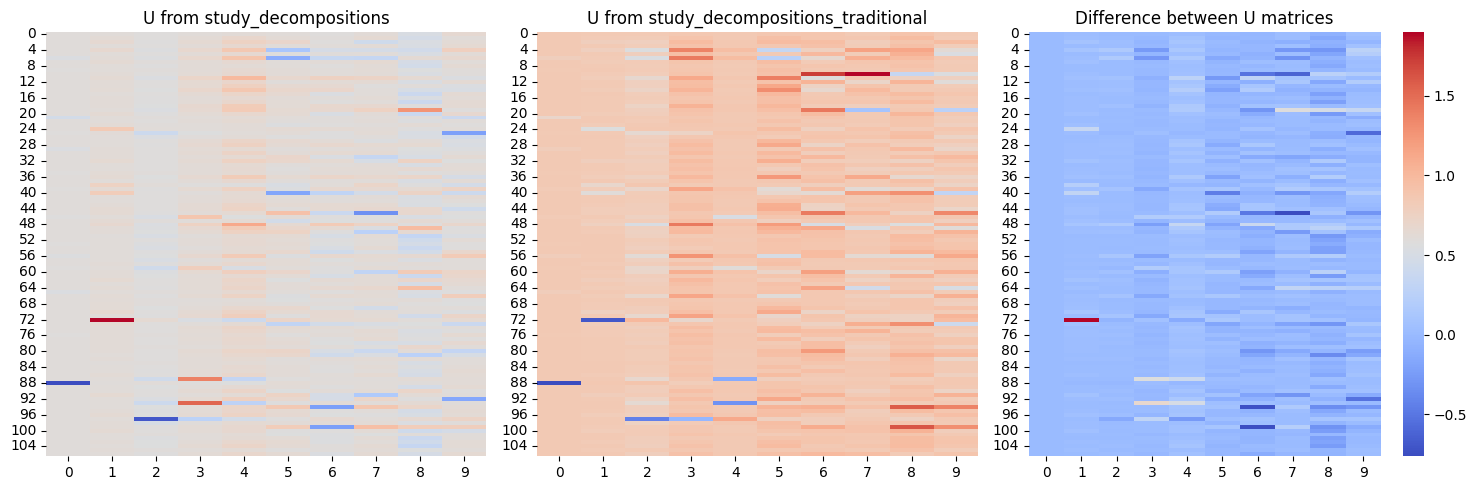

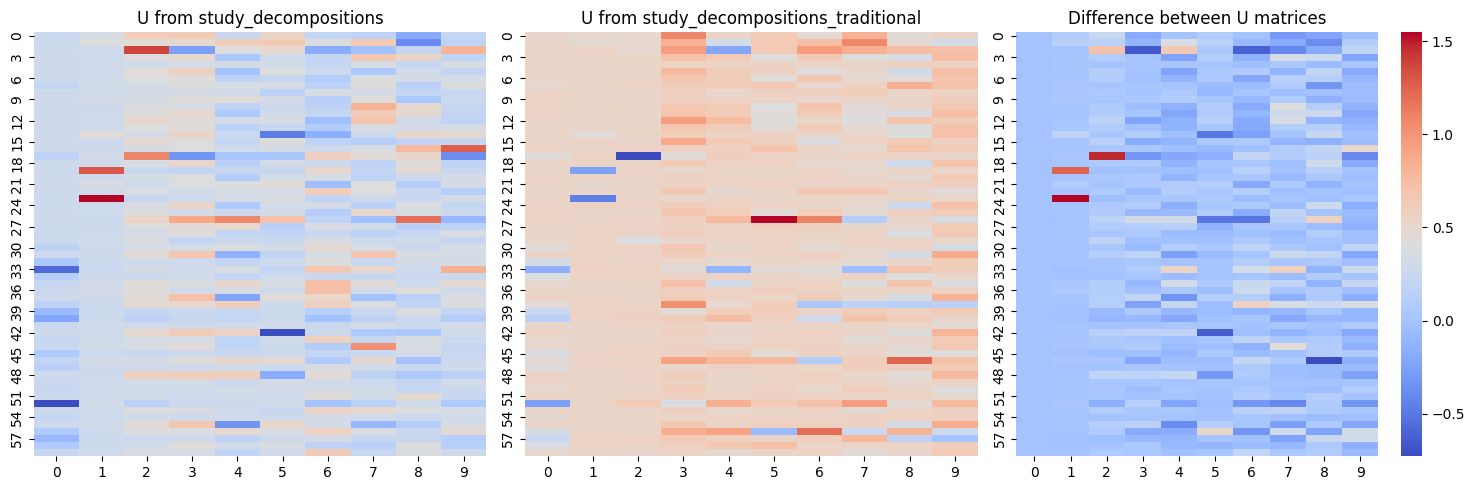

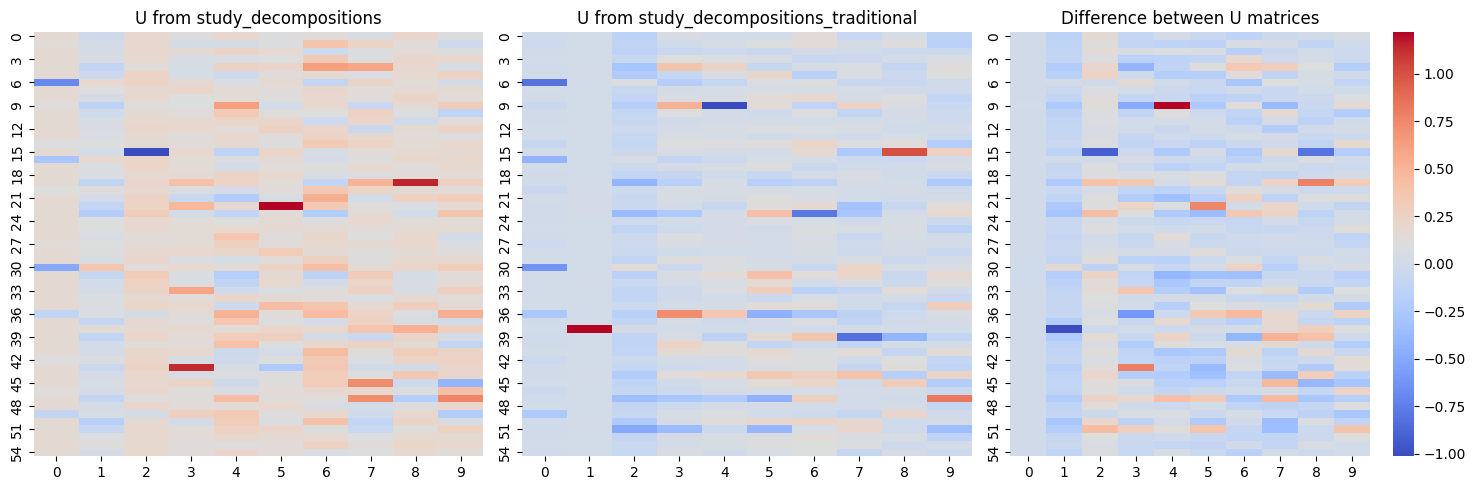

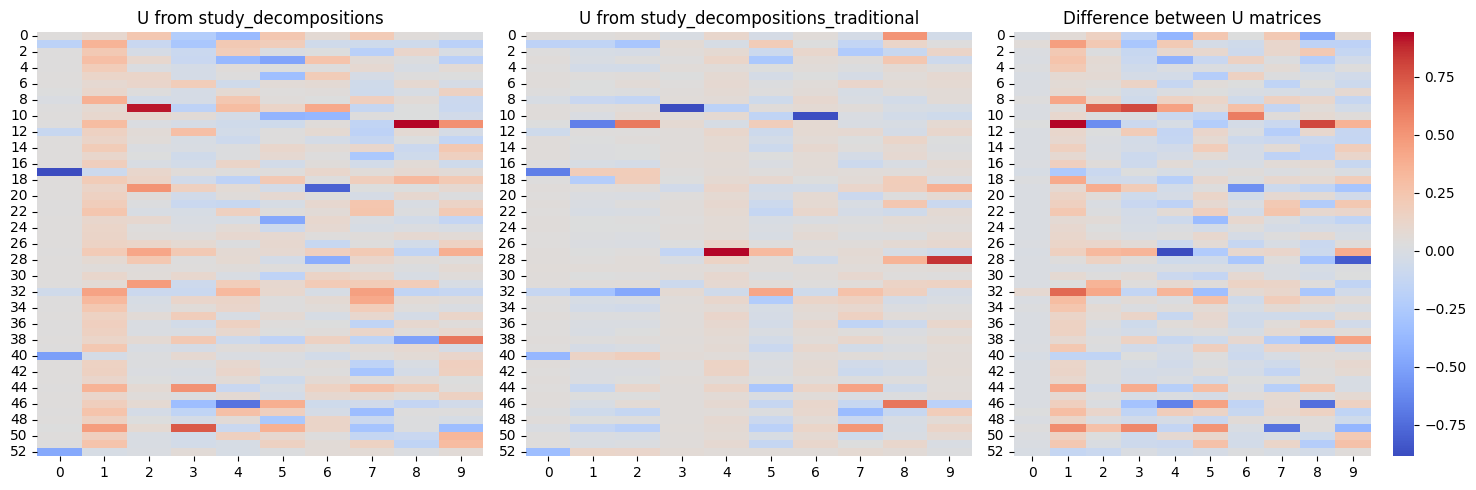

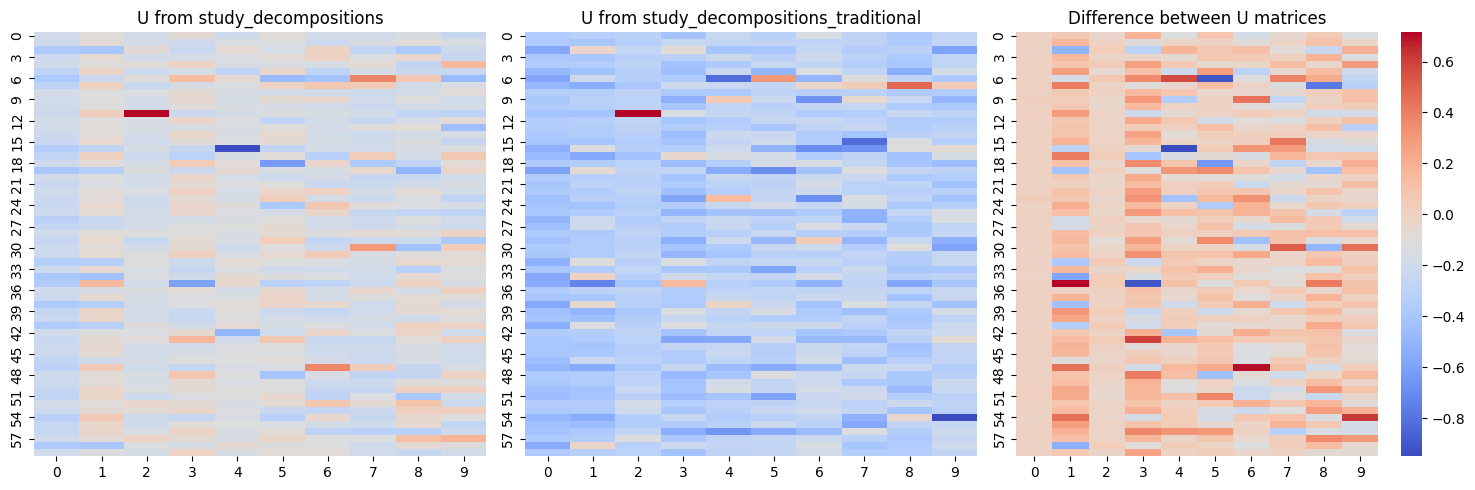

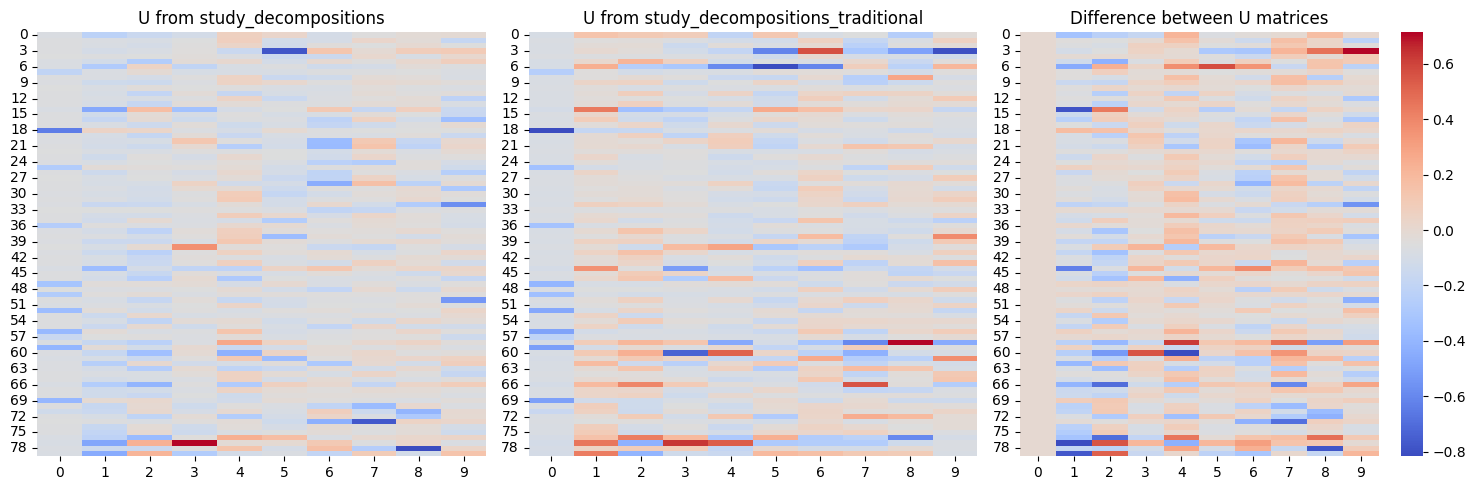

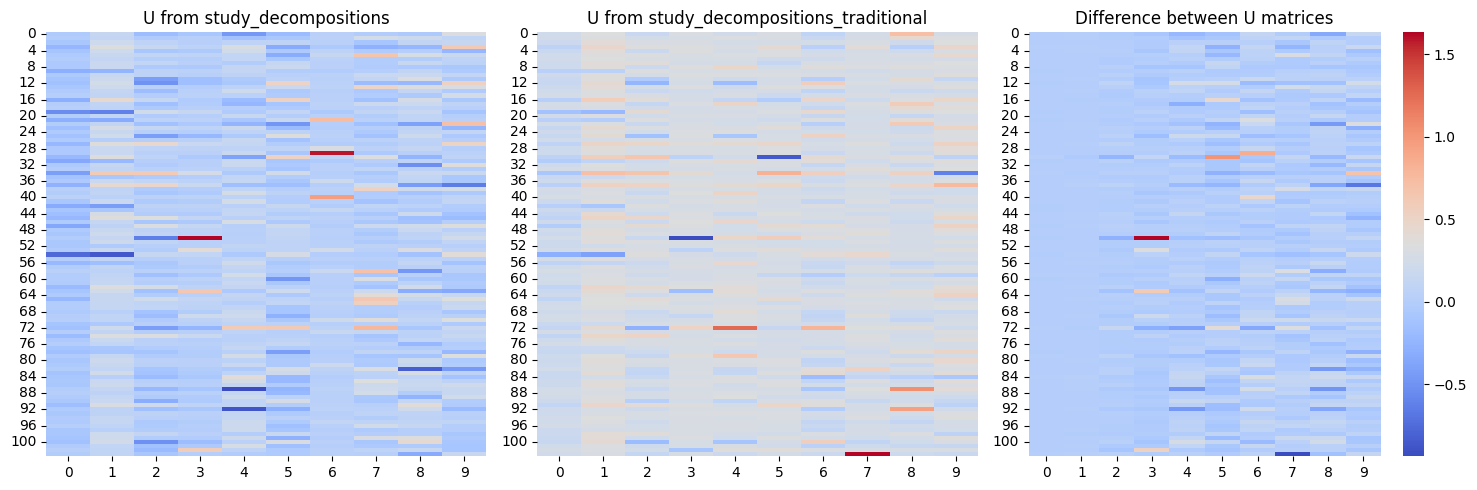

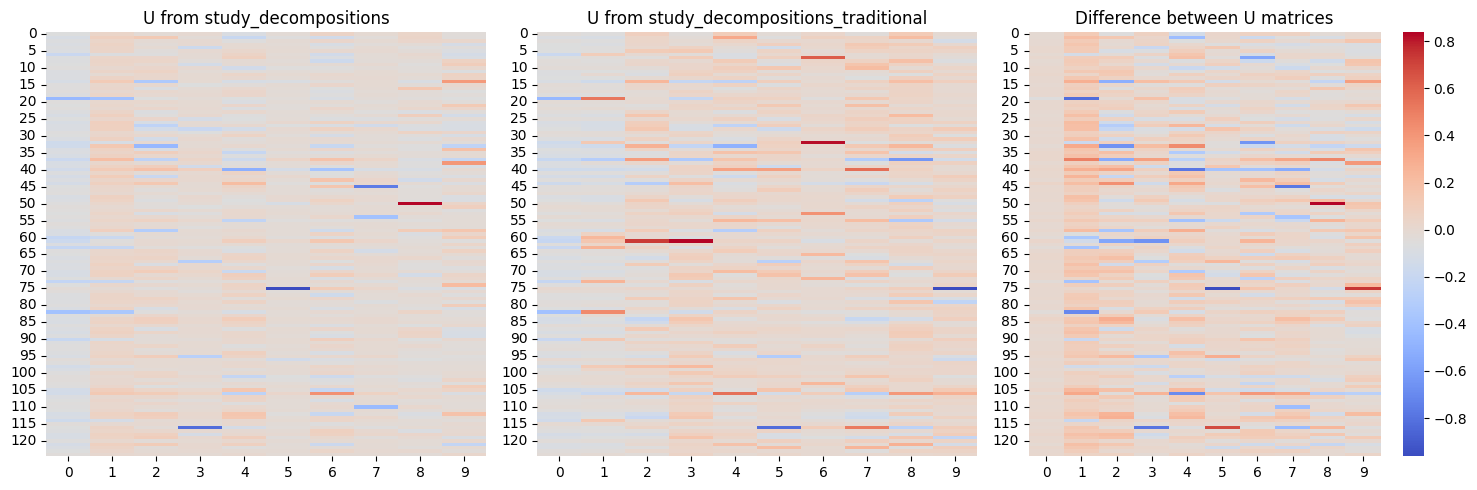

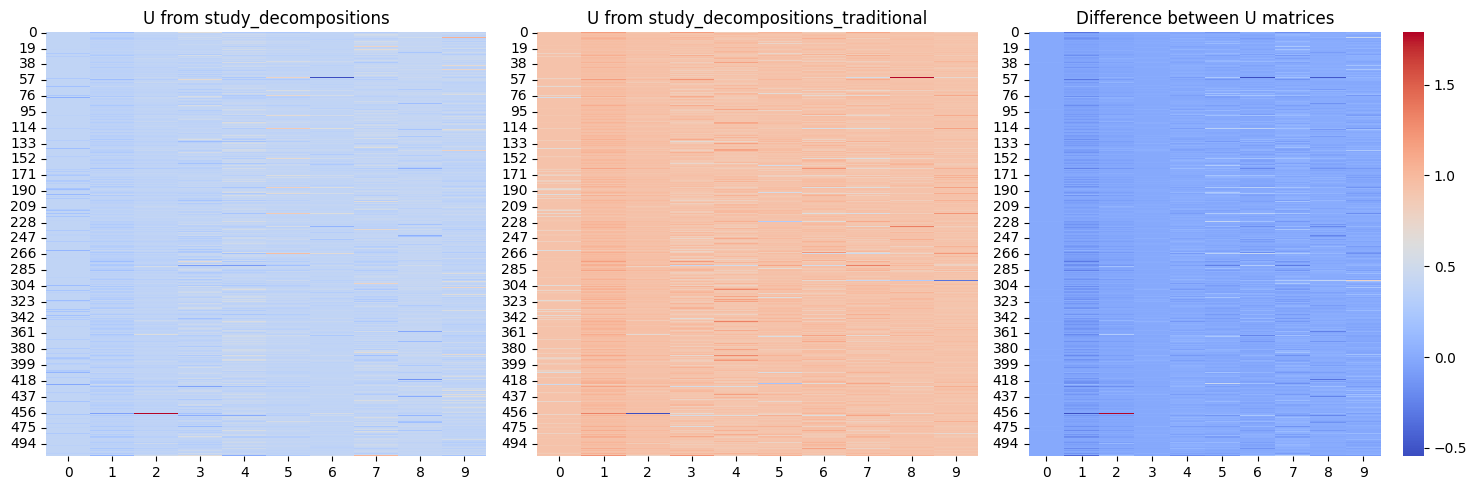

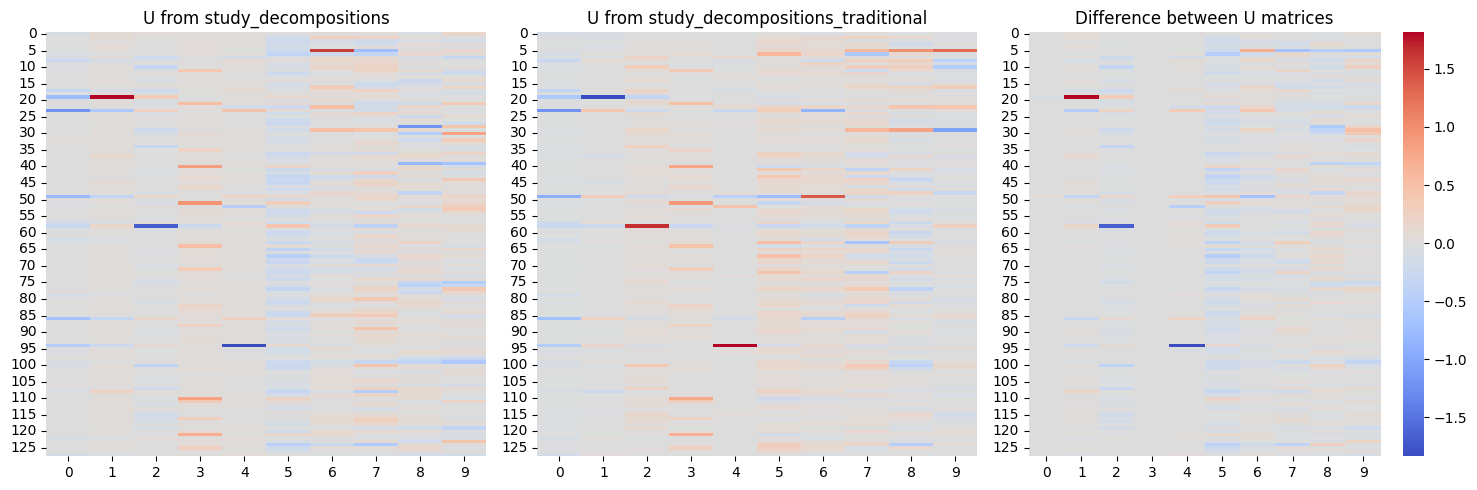

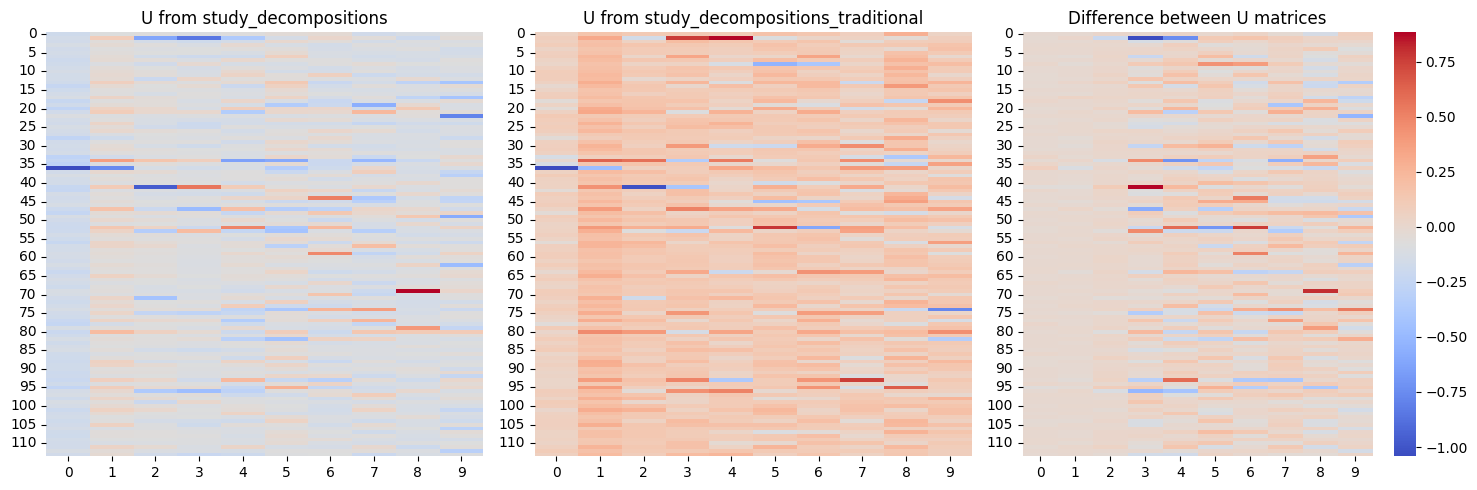

In [86]:
for study in unique_studies:
    plot_study_U(study)